In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format',  '{:,}'.format)

In [3]:
df = pd.read_parquet('../data/clean/transactions.parquet')
df['w'] = df['t_dat'].dt.to_period('W')

In [15]:
df['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [11]:
stats = df.groupby('customer_id').agg(cnt=('article_id', 'count'), money=('price', 'sum'))

In [10]:
stats.value_counts()

cnt 
1       131514
2       127441
3        95686
4        82082
5        64635
         ...  
676          1
545          1
672          1
546          1
1895         1
Length: 747, dtype: int64

<AxesSubplot:xlabel='money', ylabel='Count'>

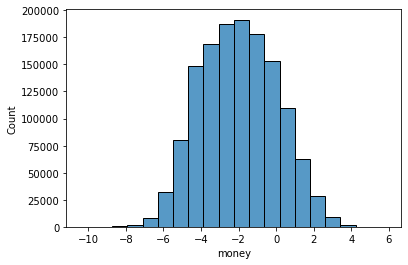

In [14]:
sns.histplot(np.log2(stats['money']), bins=20)

In [20]:
stats['cnt'].describe()

count          1,362,281.0
mean    23.334630667241193
std      39.24225328010775
min                    1.0
25%                    3.0
50%                    9.0
75%                   27.0
max                1,895.0
Name: cnt, dtype: float64

<AxesSubplot:xlabel='cnt', ylabel='Count'>

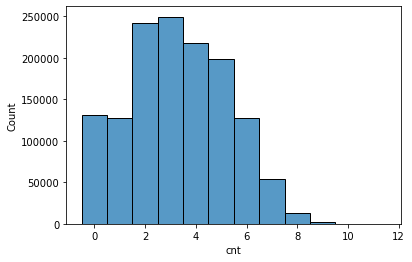

In [8]:
sns.histplot(np.log2(stats['cnt']), discrete=True)

In [14]:
c = df['customer_id'].unique()
sample = set(np.random.choice(c, size=5_000))
df = df[df['customer_id'].isin(sample)]

In [69]:
df.shape

(115603, 6)

In [17]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,w
619,2018-09-20,031087414c01a0524b5c9d121b98ef5a93f240db163923...,628466002,0.076254,2,2018-09-17/2018-09-23
620,2018-09-20,031087414c01a0524b5c9d121b98ef5a93f240db163923...,604349001,0.015237,2,2018-09-17/2018-09-23
621,2018-09-20,031087414c01a0524b5c9d121b98ef5a93f240db163923...,628466001,0.076254,2,2018-09-17/2018-09-23
659,2018-09-20,031dacb19b2f7003ccc838290d15c933ecf916503c428c...,479227020,0.005068,2,2018-09-17/2018-09-23
868,2018-09-20,04c59dcc2794b24848199096a6af850e2c0289dad229f7...,654434002,0.008627,1,2018-09-17/2018-09-23


In [43]:
stats = df.groupby(['customer_id', 'w'], observed=True).agg(
    no_items=('article_id', 'count'),
    uniq_items=('article_id', 'nunique')
)
stats['prop_uniq'] = stats['uniq_items'] / stats['no_items']

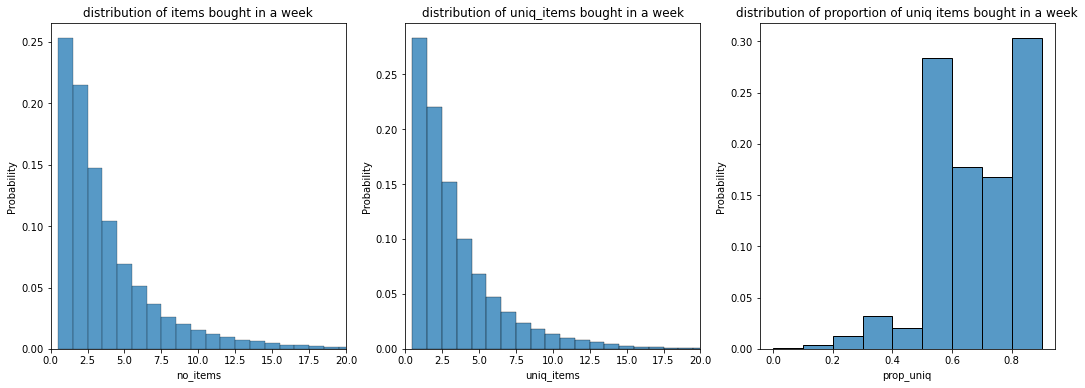

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
_ = sns.histplot(data=stats, x='no_items', discrete=True, stat='probability', ax=ax[0])
_.set(title='distribution of items bought in a week', xlim=(0, 20))

_ = sns.histplot(data=stats, x='uniq_items', discrete=True, stat='probability', ax=ax[1])
_.set(title='distribution of uniq_items bought in a week', xlim=(0, 20))

_ = sns.histplot(data=stats, x='prop_uniq', stat='probability', ax=ax[2], bins=np.arange(0, 1, .1))
_.set(title='distribution of proportion of uniq items bought in a week');

only 5% of customers will buy at least 12 items

In [66]:
stats = df.groupby('customer_id', observed=True).agg(
    orders=('t_dat', 'nunique')
)

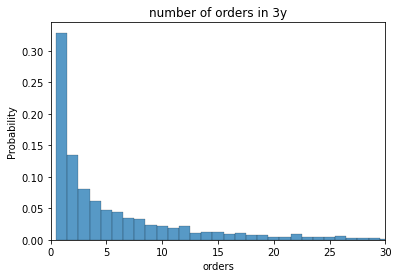

In [71]:
_ = sns.histplot(data=stats, x='orders', discrete=True, stat='probability')
_.set(title='number of orders in 3y', xlim=(0, 30));

In [23]:
df['sales_channel_id'].value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

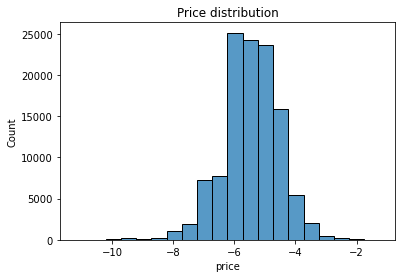

In [74]:
_ = sns.histplot(np.log2(df['price']), bins=20)
_.set(title='Price distribution');

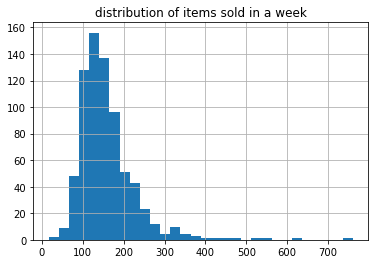

In [76]:
_ = df['t_dat'].value_counts().sort_index().hist(bins=30)
_.set(title='distribution of items sold in a week');

In [ ]:
# calendar, April Easter
# November Xmas
# June ???
# last sunday of sept

# test period has sept special day (last sunday of EOSept)
# season / sale?

In [29]:
_ = df['t_dat'].value_counts().sort_index()

_[_ > 80_000]

2018-09-29    141700
2018-11-23    142018
2018-11-24     80235
2019-04-06    119601
2019-04-24     80711
2019-05-16     97320
2019-06-19    104052
2019-06-20     92778
2019-06-21     84136
2019-06-22     87802
2019-06-23     80648
2019-06-24     95110
2019-06-25     91365
2019-06-26     96337
2019-06-27     82326
2019-07-24    124683
2019-09-28    198622
2019-11-03     84406
2019-11-28    106257
2019-11-29    160875
2020-04-04     80500
2020-04-11    162799
2020-06-17    110981
2020-06-18     84563
2020-06-24     98790
2020-06-25     88684
Name: t_dat, dtype: int64

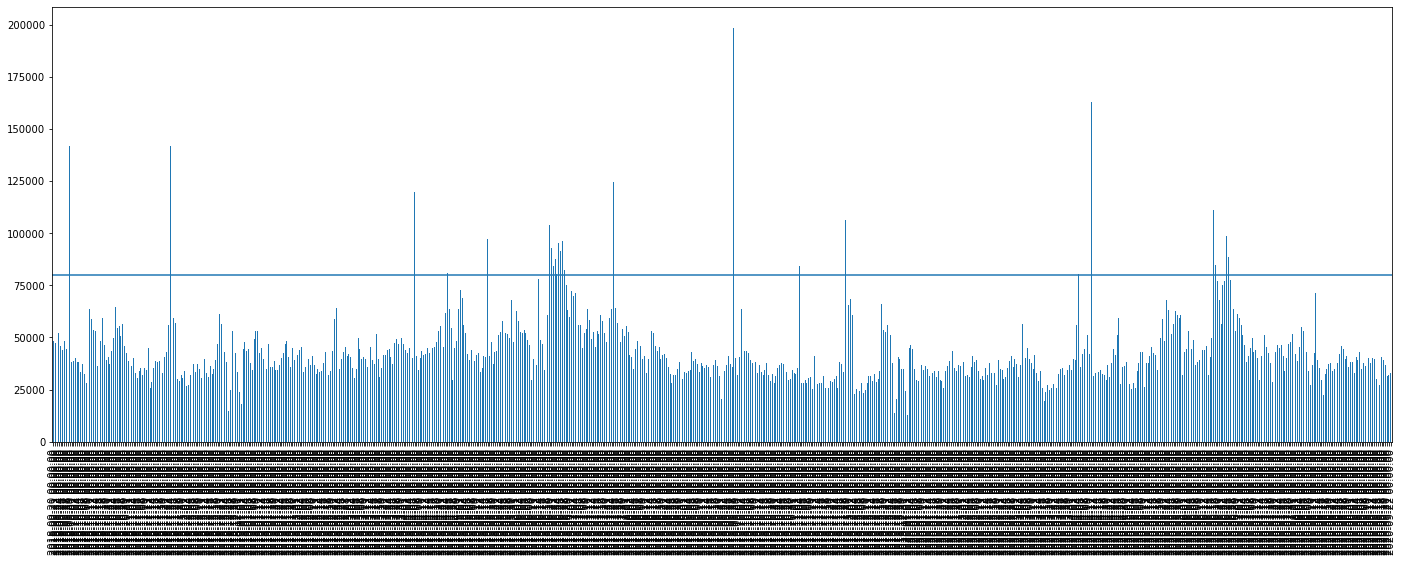

In [25]:
df['t_dat'].value_counts().sort_index().plot.bar(figsize=(24, 8))
plt.axhline(80_000)

In [30]:
cs = df.groupby('t_dat').agg(customers=('customer_id', 'nunique'))

<AxesSubplot:xlabel='t_dat'>

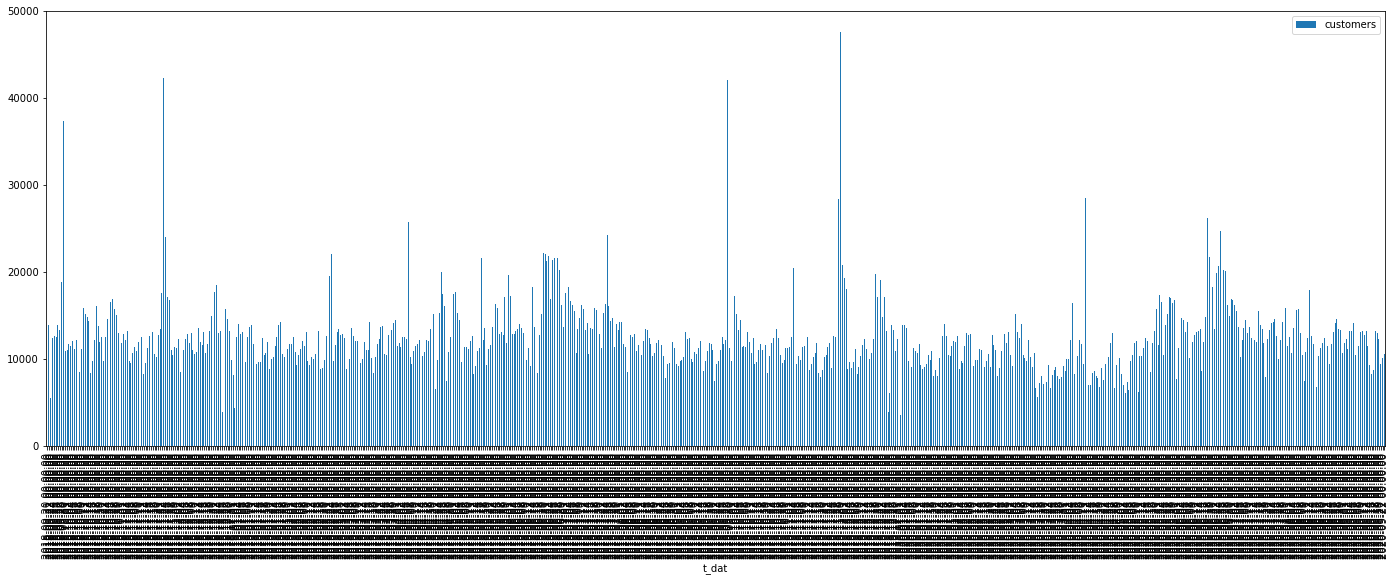

In [32]:
cs.sort_index().plot.bar(figsize=(24, 8))

<AxesSubplot:>

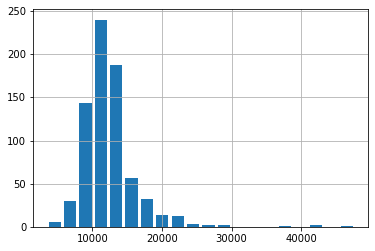

In [41]:
cs['customers'].hist(bins=20, rwidth=.8)

In [35]:
cs['customers'].describe()

count      734.000000
mean     12370.816076
std       4000.537826
min       3484.000000
25%      10153.750000
50%      11856.000000
75%      13459.500000
max      47643.000000
Name: customers, dtype: float64

In [34]:
cs[cs['customers'] > 20_000]

,customers
t_dat,
2018-09-29,37398
2018-11-23,42300
2018-11-24,23958
2019-02-23,22084
2019-04-06,25693
2019-04-24,20044
2019-05-16,21566
2019-06-19,22232
2019-06-20,22019


<AxesSubplot:xlabel='w'>

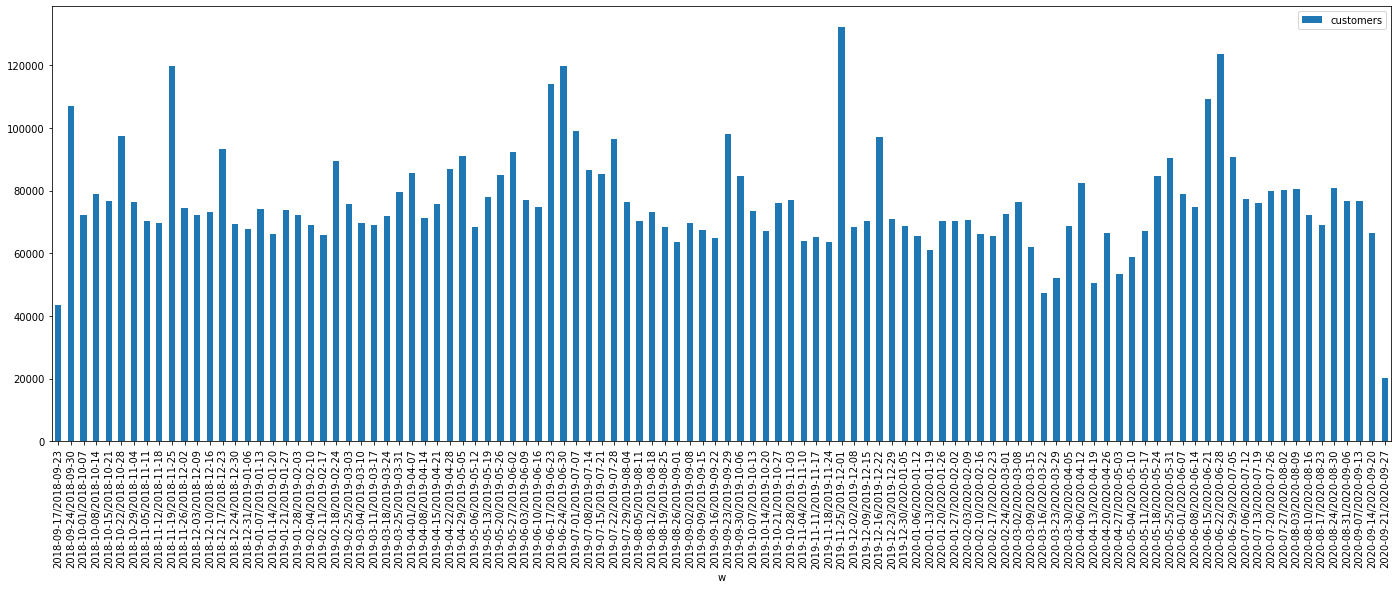

In [4]:
_ = df.groupby('w').agg(customers=('customer_id', 'nunique'))
_.sort_index().plot.bar(figsize=(24, 8))

In [7]:
_.sort_values('customers')[:10]

,customers
w,
2020-09-21/2020-09-27,20233
2018-09-17/2018-09-23,43474
2020-03-16/2020-03-22,47253
2020-04-13/2020-04-19,50617
2020-03-23/2020-03-29,52184
2020-04-27/2020-05-03,53276
2020-05-04/2020-05-10,58650
2020-01-13/2020-01-19,61096
2020-03-09/2020-03-15,62028


In [10]:
_.sort_values('customers', ascending=False)[:20]

,customers
w,
2019-11-25/2019-12-01,132183
2020-06-22/2020-06-28,123434
2019-06-24/2019-06-30,119805
2018-11-19/2018-11-25,119802
2019-06-17/2019-06-23,113958
2020-06-15/2020-06-21,109321
2018-09-24/2018-09-30,107056
2019-07-01/2019-07-07,99063
2019-09-23/2019-09-29,97992


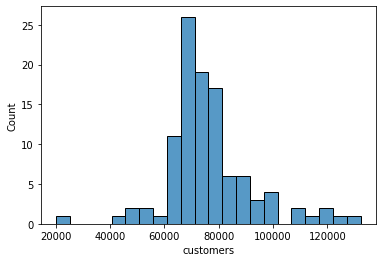

In [20]:
sns.histplot(_['customers']);

In [5]:
_.describe()

,customers
count,106.0
mean,"76,305.8679245283"
std,"16,147.671481303558"
min,"20,233.0"
25%,"68,314.75"
50%,"73,293.0"
75%,"80,745.75"
max,"132,183.0"


<AxesSubplot:>

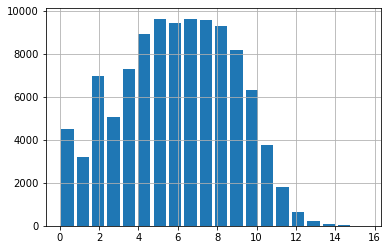

In [48]:
np.log2(df['article_id'].value_counts()).hist(bins=20, rwidth=.8) # poisson?

In [44]:
df['article_id'].value_counts().sort_values(ascending=False).head(50)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
720125001    21063
156231001    21013
562245046    20719
562245001    20464
351484002    20415
399256001    20242
673396002    19834
568601006    19379
448509014    19216
673677002    19143
751471001    18263
608776002    17886
160442007    17866
688537004    17754
573716012    16690
158340001    16533
590928001    15906
579541001    15612
706016015    15571
554450001    15245
599580017    15230
484398001    15205
507909001    15145
160442010    15091
562245018    14873
741356002    14454
684209004    14378
111586001    14191
636323001    13893
111593001    13888
572797001    13692
783346001    13631
565379001    13557
717490008    13378
228257001    13360
749699002    12863
706016006    12846
688537011    12778
399256005    12540
678942001    12519
Name: article_id, dtype: int64

In [21]:
_ = df.groupby(['customer_id', 'article_id']).agg(cnt=('price', 'count'))

In [24]:
df['t_dat'].dt.to_period('M').unique()

<PeriodArray>
['2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
 '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
 '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
 '2020-06', '2020-07', '2020-08', '2020-09']
Length: 25, dtype: period[M]

In [34]:
_.sort_values('cnt', ascending=False)[:1000]['cnt'].sum()

33076

In [31]:
_['cnt'].sum()

31788324

<AxesSubplot:xlabel='cnt', ylabel='Count'>

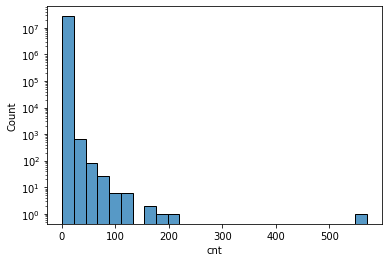

In [26]:
sns.histplot(_['cnt'], log_scale=(None, True))

In [44]:
_['morethan2'] = _['cnt'] >= 2
_ = _.reset_index()

<AxesSubplot:ylabel='Count'>

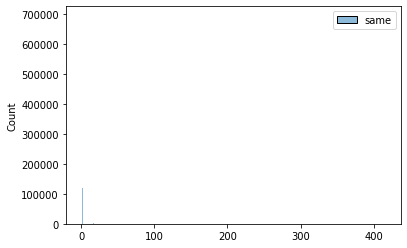

In [48]:
x2 = _.groupby(['customer_id']).agg(same=('morethan2', 'sum'))

In [49]:
x2.describe([])

,same
count,"1,362,281.0"
mean,2.5805344125037344
std,6.837658838922368
min,0.0
25%,0.0
50%,0.0
75%,2.0
max,416.0


In [46]:
_.groupby(['customer_id', 'morethan2']).agg(cnt=('cnt', 'count'))

cnt
customer_id                                        morethan2     
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... False       17
                                                   True         2
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee... False       47
                                                   True        17
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... False       10
...                                                           ...
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17... False       35
                                                   True         5
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... False        5
                                                   True         1
ffffd9ac14e89946416d80e791d064701994755c3ab686a... False        1

[1994903 rows x 1 columns]

In [ ]:
# seasonal items / all time good items
# ABC analysis XYZ (monthly cycle)
# catboost cat features? 

In [49]:
a = pd.read_csv('../data/raw/articles.csv.zip')

In [51]:
a[a['article_id'] == 706016001]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


In [21]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,w
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508305084745762,2,2018-09-17/2018-09-23
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0304915254237288,2,2018-09-17/2018-09-23
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152372881355932,2,2018-09-17/2018-09-23
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169322033898305,2,2018-09-17/2018-09-23
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169322033898305,2,2018-09-17/2018-09-23


In [61]:
# shopping frequency

nodup = df[['customer_id', 't_dat']].drop_duplicates()

nodup['prev'] = nodup.groupby('customer_id')['t_dat'].shift(1)
nodup['delta'] = nodup['t_dat'] - nodup['prev']
nodup['r'] = nodup.groupby('customer_id')['t_dat'].rank(ascending=False)

nodup = nodup[nodup['r'] == 1]
nodup = nodup.set_index('customer_id')

In [68]:
nodup['delta'].describe()

count                         914308
mean      95 days 08:11:16.477510862
std      118 days 22:09:54.631108206
min                  1 days 00:00:00
25%                 14 days 00:00:00
50%                 48 days 00:00:00
75%                131 days 00:00:00
max                731 days 00:00:00
Name: delta, dtype: object

<AxesSubplot:xlabel='delta', ylabel='Count'>

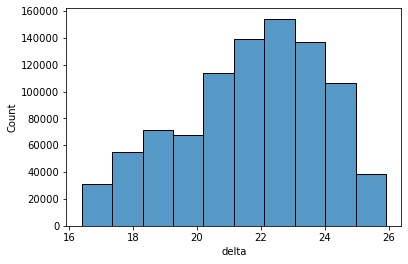

In [69]:
sns.histplot(np.log2(nodup['delta'].dt.total_seconds()), bins=10)

In [79]:
_ = stats.join(nodup[['delta']])

,cnt,money,delta
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21,0.6489830508474566,168 days
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86,2.601932203389827,77 days
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18,0.7047796610169483,150 days
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,0.0609830508474576,NaT
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,0.4696949152542366,70 days
...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,51,1.2923559322033875,24 days
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,84,1.807322033898301,10 days
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,45,0.7889322033898281,1 days


In [81]:
_['cnt_2'] = np.log2(_['cnt'])
_['money_2'] = np.log2(_['money'])
q = _['delta'].describe([.25, .5, .75, .1])[3:]
_['delta_cat'] = pd.cut(_['delta'], q)

In [104]:
cat = _['delta_cat'].unique()[1]

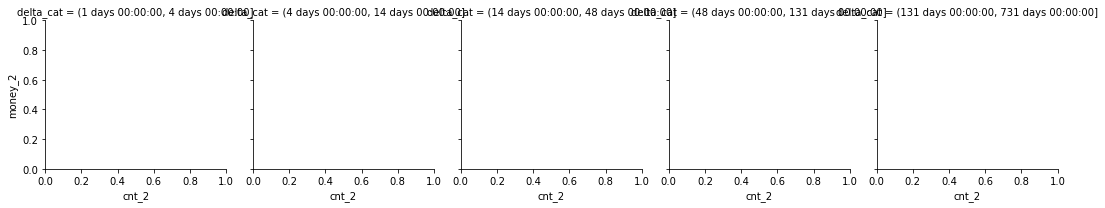

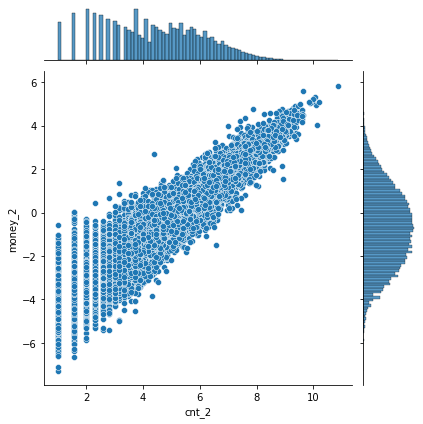

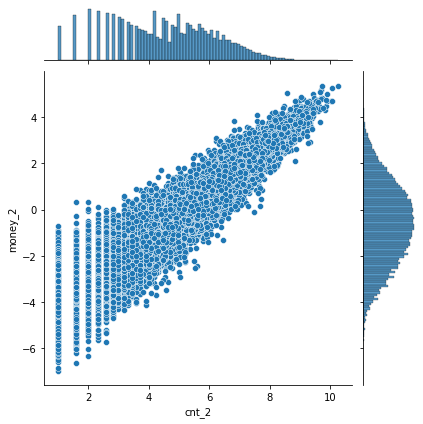

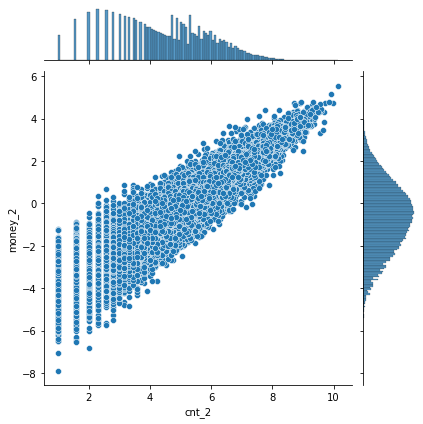

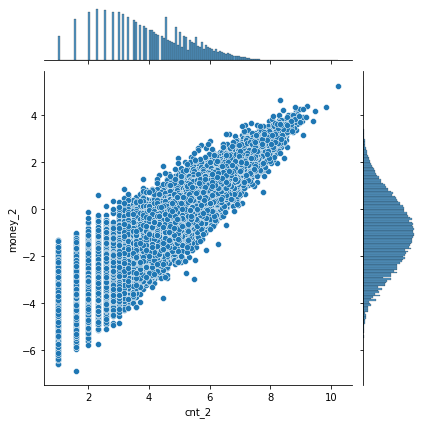

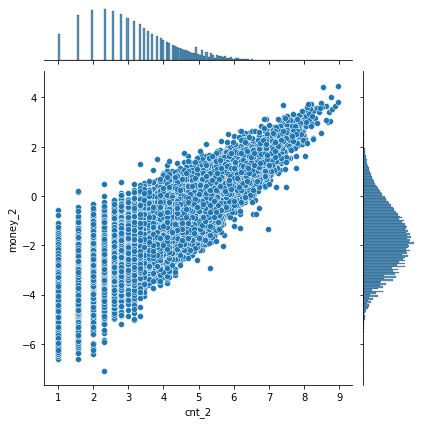

In [106]:
(
    sns.FacetGrid(data=_, col='delta_cat').map(sns.jointplot, 'cnt_2', 'money_2')
)

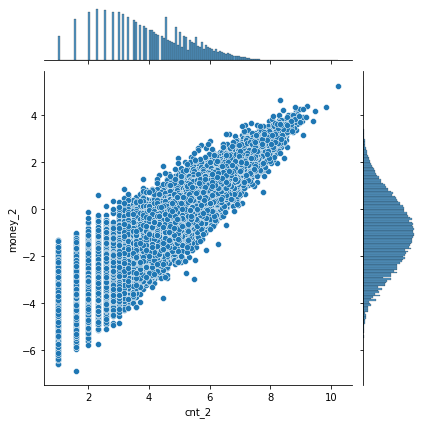

In [105]:
(
    sns.jointplot(data=_[_['delta_cat'] == cat], x='cnt_2', y='money_2')
)